# Day 2: Profitability Calculation
**Goal:** Calculate per-user profitability metrics for each marketing campaign and identify initial insights.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
file_path = r"C:\Users\Durga\Desktop\Career 2025\MeriSkill\Week1\Order_Data_Cleaned.csv"
df = pd.read_csv(file_path)
df.head()

C:\Users\Durga\AppData\Local\Temp\ipykernel_13528\338909950.py:8: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [4]:
df.columns

Index(['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU',
       'Product_Category', 'OrderLineItem', 'OrderQuantity', 'ProductCost',
       'ProductPrice', 'OrderDate', 'AcquisitionSource', 'TransactionID',
       'Fraud', 'PaymentMethod', 'CardType', 'Gender'],
      dtype='object')

In [10]:
# Convert ProductPrice and ProductCost to numeric
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
df['ProductCost'] = pd.to_numeric(df['ProductCost'], errors='coerce')
df.dropna(subset=['ProductPrice', 'ProductCost'], inplace=True)
# Check if there are any NaNs introduced (meaning invalid values)
print(df[['ProductPrice', 'ProductCost']].isnull().sum())


ProductPrice    0
ProductCost     0
dtype: int64


In [12]:
# Calculate profit per order line
df['Profit'] = (df['ProductPrice'] - df['ProductCost']) * df['OrderQuantity']
# Group by Acquisition Source (campaign)
profitability = df.groupby('AcquisitionSource').agg(
    total_revenue = ('ProductPrice', lambda x: (x * df.loc[x.index, 'OrderQuantity']).sum()),
    total_cost = ('ProductCost', lambda x: (x * df.loc[x.index, 'OrderQuantity']).sum()),
    total_profit = ('Profit', 'sum'),
    total_customers = ('CustID', 'nunique')
).reset_index()

# Calculate profit per customer
profitability['profit_per_customer'] = profitability['total_profit'] / profitability['total_customers']

profitability.sort_values(by='profit_per_customer', ascending=False)

,AcquisitionSource,total_revenue,total_cost,total_profit,total_customers,profit_per_customer
0,Google-ads\r,1.984020e+07,1.151215e+07,8.328057e+06,19239,432.873695
1,Meta-ads\r,2.572408e+06,1.493116e+06,1.079291e+06,4905,220.039024
2,Yt-Campaign\r,2.478366e+06,1.438438e+06,1.039928e+06,4921,211.324603


) missing from font(s) DejaVu Sans.ckages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


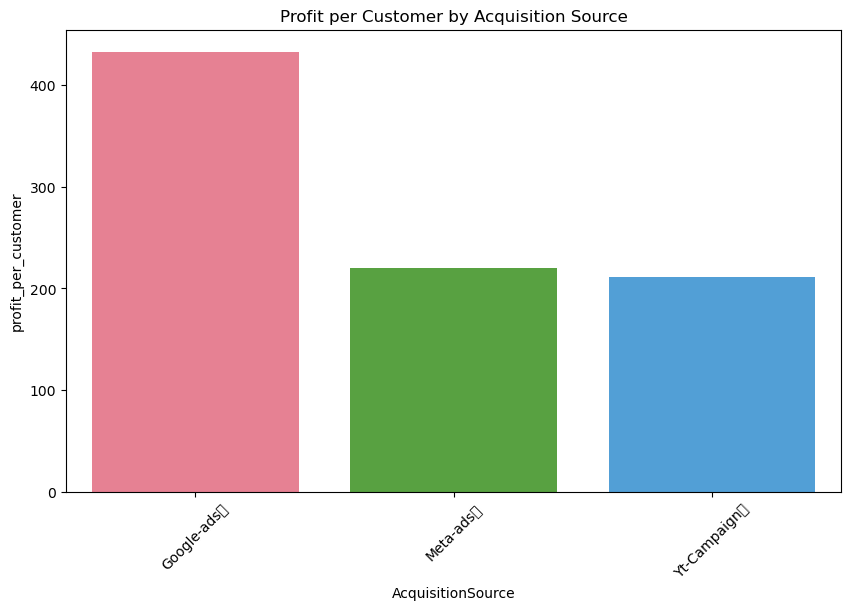

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='profit_per_customer', data=profitability, hue='AcquisitionSource', dodge=False, palette='husl')
plt.title('Profit per Customer by Acquisition Source')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # remove legend if you don’t want repetition
plt.show()

## ✅ Summary:
- Calculated revenue, cost, and profit per acquisition source.
- Derived profit per customer metric.
- Visualized the profitability of different acquisition sources.